In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import circlify


In [39]:
df = pd.read_excel('data.xlsx')
df = df.drop_duplicates()

# rename price as number to price
df = df.rename(columns={'Price as number': 'Price'})


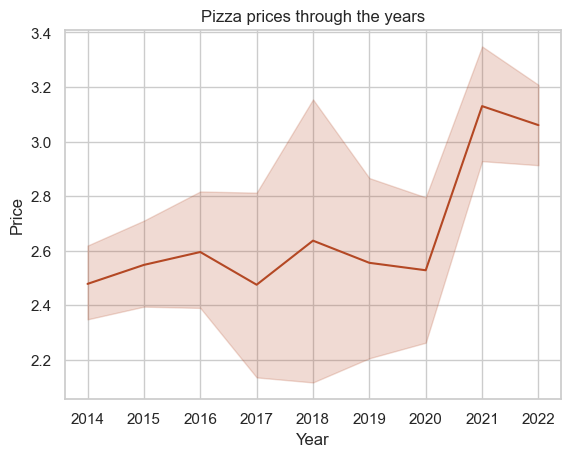

<Figure size 640x480 with 0 Axes>

In [60]:
sns.set()
plt.figure()
sns.set_style('whitegrid')

# This is where the actual plot gets made
ax = sns.lineplot(x='Year', y='Price', data=df, color="#b44824")
ax.set_title('Pizza prices through the years')
plt.show()
plt.savefig('pizza_prices.png')


In [40]:
# build dictionary with pizza styles and their popularity
pizza_styles = df['Style'].value_counts().to_dict()

circles = circlify.circlify(
    pizza_styles.values(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)



0.9759936649200115


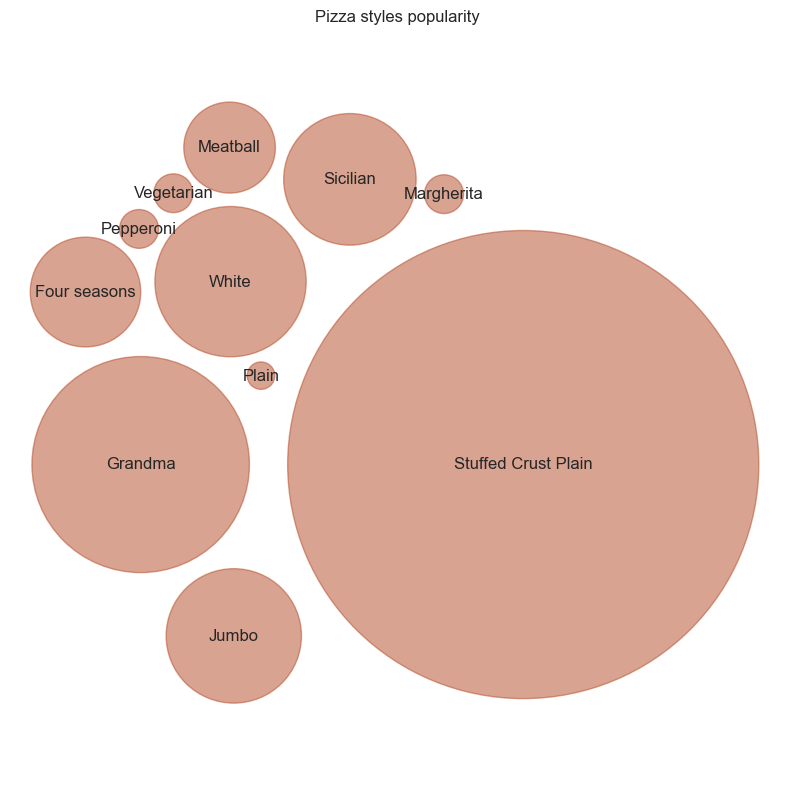

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Pizza styles popularity')
ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r
    ) for circle in circles
)

print(lim)

plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = pizza_styles.keys()

for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r * 0.9 , color='#b44824', alpha=0.5))
    plt.annotate(
        label,
        xy=(x, y),
        va='center',
        ha='center',
    )


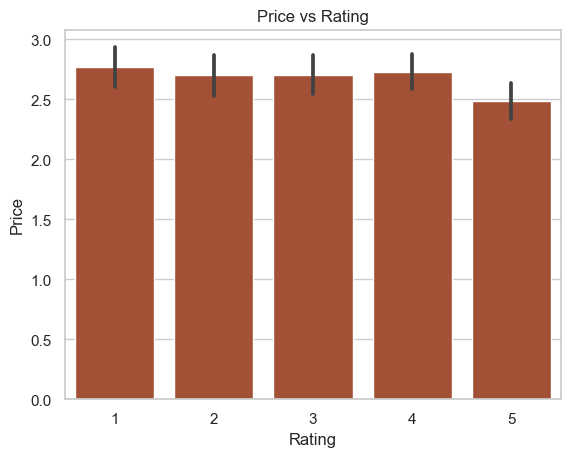

In [64]:
# bar plot to show the relationship between price and rating
plt.figure()
sns.set_style('whitegrid')
ax = sns.barplot(x='Rating', y='Price', data=df, color="#b44824")
ax.set_title('Price vs Rating')
plt.show()

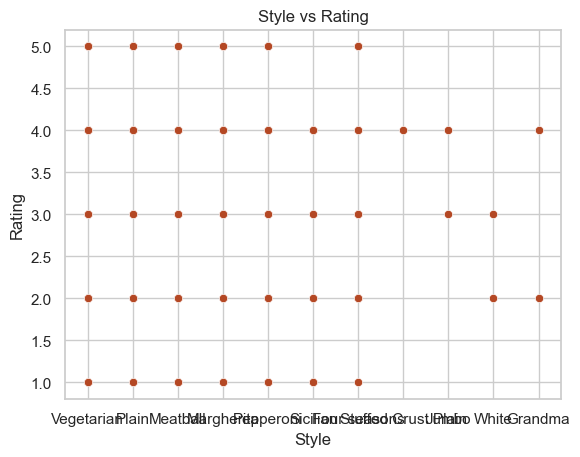

In [65]:
# scatter plot to show the relationship between style and rating
plt.figure()
sns.set_style('whitegrid')
ax = sns.scatterplot(x='Style', y='Rating', data=df, color="#b44824")
ax.set_title('Style vs Rating')
plt.show()

/var/folders/qf/8sy06pr90fq588pbt2zcphbc0000gn/T/ipykernel_1564/845830702.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df_renamed.corr(), annot=True, cmap='rocket_r')


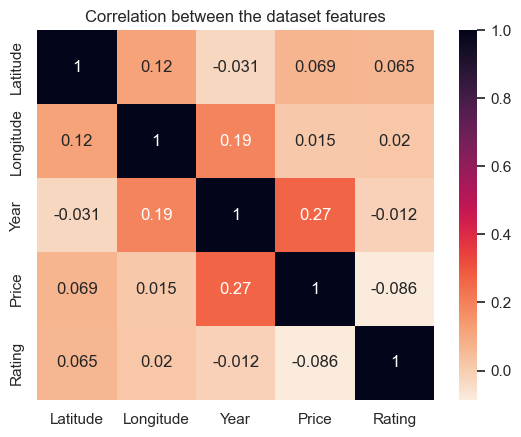

In [111]:
# make heat map to show all the correlations
plt.figure()
sns.set_style('whitegrid')
df_renamed = df.rename(columns={'location_lat': 'Latitude', 'location_lng': 'Longitude'}, inplace=False).__deepcopy__()
ax = sns.heatmap(df_renamed.corr(), annot=True, cmap='rocket_r')
ax.set_title('Correlation between the dataset features')
plt.show()